# Load Dataset

In [20]:
# !pip install kaggle

In [21]:
kaggle = '/content/kaggle.json'

In [22]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [25]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

dataset_path = "/content/dataset"

In [26]:
len(data_0), len(data_1), len(data_2), len(data_3), len(data_4), len(data_5), len(data_6), len(data_7), len(data_8), len(data_9)

(2236, 2241, 2233, 2202, 2179, 2126, 2121, 2116, 2085, 2016)

# Import Library

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Baca Gambar & Konversi ke Numerik

In [28]:
images = []
labels = []

for digit in range(10):
    folder_path = os.path.join(dataset_path, str(digit))

    for file in os.listdir(folder_path):
        if file.endswith('.png') or file.endswith('.jpg'):
            img_path = os.path.join(folder_path, file)

            img = Image.open(img_path).convert('L')  # grayscale
            img = img.resize((28, 28))               # resize

            img_array = np.array(img)

            images.append(img_array)
            labels.append(digit)

X = np.array(images)
y = np.array(labels)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (21555, 28, 28)
y shape: (21555,)


# Validasi Data

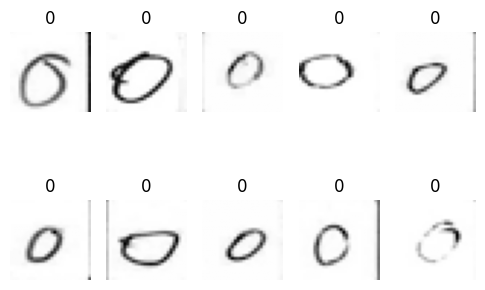

In [29]:
plt.figure(figsize=(6,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

# Preprocessing untuk ANN (MLP)

In [30]:
# flatten
X = X.reshape(X.shape[0], -1)
print(X.shape)  # (n_sample, 784)

(21555, 784)


In [31]:
# normalisasi (Min-Max scaling khusus citra)
X = X / 255.0

In [32]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y, 10)
print(y_cat.shape)

(21555, 10)


# Split Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Model ANN (MLP)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Membuat model Artificial Neural Network tipe Multi-Layer Perceptron (MLP)
model = Sequential([
    # Hidden layer 1:
    # 256 neuron, menerima 784 fitur (hasil flatten 28x28),
    # menggunakan ReLU untuk menangani non-linearitas
    Dense(256, activation='relu', input_shape=(784,)),

    # Hidden layer 2:
    # 128 neuron untuk mengekstraksi fitur yang lebih kompleks
    Dense(128, activation='relu'),

    # Output layer:
    # 10 neuron sesuai jumlah kelas (digit 0–9),
    # menggunakan softmax untuk menghasilkan probabilitas tiap kelas
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile & Train

In [35]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1144 - loss: 2.4372 - val_accuracy: 0.2081 - val_loss: 2.2172
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2031 - loss: 2.1959 - val_accuracy: 0.2354 - val_loss: 2.0614
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2854 - loss: 2.0414 - val_accuracy: 0.3264 - val_loss: 1.9444
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3169 - loss: 1.9521 - val_accuracy: 0.3368 - val_loss: 1.9025
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3781 - loss: 1.8579 - val_accuracy: 0.3936 - val_loss: 1.8230
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4166 - loss: 1.7683 - val_accuracy: 0.4528 - val_loss: 1.6949
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4402 - loss: 1.7150 - val_accuracy: 0.4980 - val_loss: 1.6269
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4573 - loss: 1.6792 - val_accuracy: 

# Evaluasi

In [36]:
loss, acc = model.evaluate(X_test, y_test)
print(f'Loss pada data uji    : {loss:.2f}')
print(f'Akurasi pada data uji : {acc:.2f}')

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5971 - loss: 1.2634
Loss pada data uji    : 1.24
Akurasi pada data uji : 0.60
